<a href="https://colab.research.google.com/github/Vidyamgunashekar/522_MSIS_winter23/blob/main/MSIS522_Assignment1_vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

**Cloning DF to avoid changes in original dataframe**

In [5]:
titanic_df=titanic

In [6]:

print("\nMissing values :  ", titanic_df.isnull().sum().values.sum())


Missing values :   866


**The missing values columns**

In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [8]:
#age 
age_Mean=titanic_df['Age'].mean()

#embarked
embarked_Mode = titanic_df['Embarked'].mode()[0]

#Impute
titanic_df.fillna({'Age': age_Mean, 'Cabin': 'other', 'Embarked': embarked_Mode}, inplace=True)


**Checking if all missing values are imputed**

In [9]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [11]:
#sort the dataframe on ticket column in descending order
sorted_df=titanic_df.sort_values(by='Fare',ascending=False)
print("\nThe name of the person with 16th most expensive ticket: ",sorted_df.iloc[15].loc["Name"])


The name of the person with 16th most expensive ticket:  Farthing, Mr. John


### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [12]:
#create dataframe with all the survived females
females_survived_df=titanic_df.loc[(titanic_df["Sex"]=="female")& (titanic_df["Survived"]==1)]
sorted_females_survived_df=females_survived_df.sort_values(by="Fare",ascending=False)
#sorted_females_survived_df.shape
print("\nThe name of the female who survived and has the 6th most expensive ticket: ",sorted_females_survived_df.iloc[5].loc["Name"])


The name of the female who survived and has the 6th most expensive ticket:  Baxter, Mrs. James (Helene DeLaudeniere Chaput)


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. 
Hint: pivot_table is your friend.

In [13]:
pivot_table = titanic_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


**The pivot table shows that :**
1. The surivival rate for females in Pclass 1 is 96.8%, in Pclass 2 is 92% and in Pclass 3 is 50%
2. The survival rate for males in Pclass 1 is 36.88%, in Pclass 2 is 15.74% and in Pclass 3 is 13.54%

**Observations:**
1. The survival rate for females is higher than the survival rate of makes in each class
2. This says that the gender is a significant factor for determining survival rate on titanic
3. Also the Passenger class had a significant impact on survival rate
4. Clearly it shows that the passengers of Pclass 1 had a much higher survival rate than those of Pclass 2 and 3

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

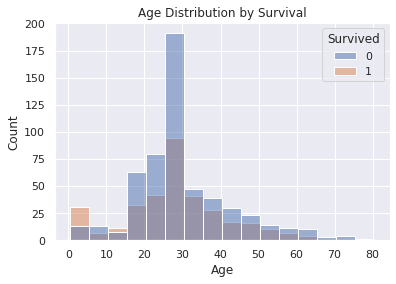

In [14]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', binwidth=5)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')

plt.show()

 The histogram suggests that the age of the passenger was a significant factor in determining survival on the Titanic, with the majority of the non-survived population being in the age range of 20-40 and the majority of the survived population being in the age range of 20-30. but the data contains missing values in the age column, so the visualization may not be accurate for the missing values. 
 So we need to check the correlation between age, fare and survival using Corr function

In [15]:
# Calculate the correlation matrix
corr = titanic_df[['Age', 'Fare', 'Survived']].corr()

# Print the correlation matrix
print(corr)


               Age      Fare  Survived
Age       1.000000  0.091566 -0.069809
Fare      0.091566  1.000000  0.257307
Survived -0.069809  0.257307  1.000000


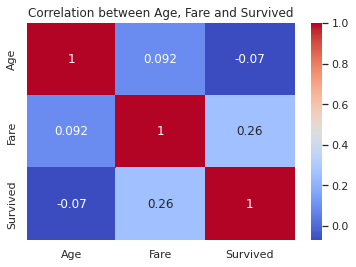

In [16]:

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot = True, cmap='coolwarm')

plt.title('Correlation between Age, Fare and Survived')

plt.show()


**From above visualisation, my observation is that**

    1. Age might not play significant impact on survival compared to fare as the correlation is negative
    2. Fare has a positive correlation with the survival. 
    
So, **Fare** of the passenger is more important factor in determining the survival on the Titanic compared to the age. 

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [17]:
#7.1
pivot_table_sibsp = titanic_df.pivot_table(values='Survived', index='SibSp', aggfunc='mean')
pivot_table_parch = titanic_df.pivot_table(values='Survived', index='Parch', aggfunc='mean')

print("Survival rate when passengar had siblings: ",pivot_table_sibsp)
print("Survival rate when passengar had parents and children: ",pivot_table_parch)


Survival rate when passengar had siblings:         Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
Survival rate when passengar had parents and children:         Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


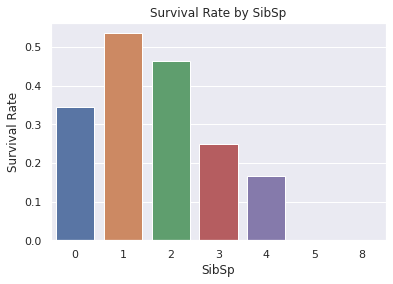

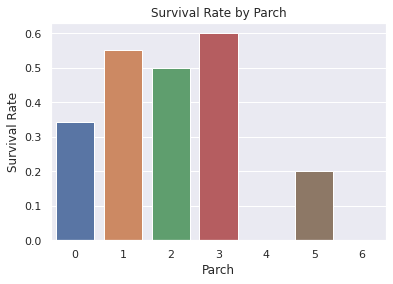

In [18]:
#7.2
sns.barplot(x=pivot_table_sibsp.index, y=pivot_table_sibsp['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by SibSp')
plt.show()

sns.barplot(x=pivot_table_parch.index, y=pivot_table_parch['Survived'])
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Parch')
plt.show()

**Observations:**

1. If passenger had 1 sibling the survival rate is greater than the passenger with >2 or no siblings
2. If passenger had 3 family members, the survival rate is greater

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

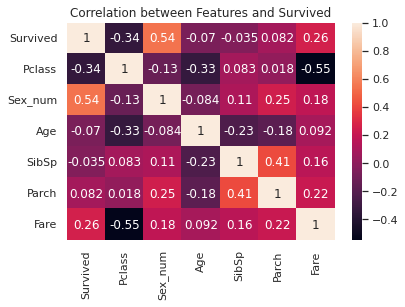

In [19]:

#converting Sex categorical value to numeric value to get more insight from heatmap
# Create a dictionary that maps the 'Sex' column values to numeric values
sex_map = {'male': 0, 'female': 1}

# Use the map() function to map the 'Sex' column values to numeric values
titanic_df['Sex_num'] = titanic_df['Sex'].map(sex_map)

#chosing columns that give insights , ignoring all categorical columns and passenger_id
corr_df=  pd.DataFrame(titanic_df, columns=["Survived", "Pclass", "Sex_num", "Age", "SibSp",
       "Parch", "Fare"])
corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, annot=True)

plt.title('Correlation between Features and Survived')
plt.show()


**From yhe above heatmap, I can observe that:**
1. There is positive correlation between Survival and Fare features, so as the fare increases the survival rate increases. Higher the ticket fare, higher the chances for survival. 
2. Passenger having parent increases the survival rate. 
3. Clearly having siblings doesnt have any impact on survival rate as the correlation is negative
4. Age also has no impact on the survival rate and its important to note that the data contains missing values in some of the columns which might give inaacurate correlation
5. The heatmap as a positive correlation between gender and the survival rate. Clearly most of the women were saved first. 
6. Surprisingly passenger class doesnt impact the survival rate, may be priority was given to gender where more females from all classes.
7. Passenger class has strongly negative correlation with Fare because 1st class tickets are more expensive than lower class tickets, as class goes down(closer to 1), the fare goes up
8. There is strong positive correlation between SibSp and Parch - becuase children often have siblings, and parents and children travel together
9. Finally age and Pclass are moderately negatively correlated- since richer people are generally older


### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

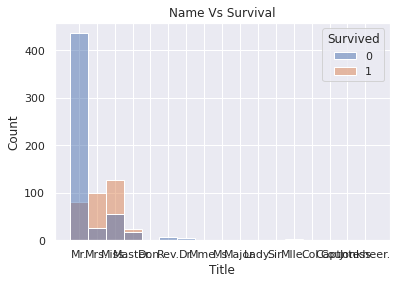

In [21]:
#Finding 1: Check if title has any significance on the survival

titanic_df['Title'] = titanic_df['Name'].str.extract(r'([A-Za-z]+\.)')

sns.histplot(data=titanic_df, x='Title', hue='Survived', binwidth=10)

plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Name Vs Survival')

plt.show()


In [22]:
#creating a pivot table of titlea and survival
pivot_table_title = titanic_df.pivot_table(values='Survived', index='Title', aggfunc='mean')

print(pivot_table_title)


           Survived
Title              
Capt.      0.000000
Col.       0.500000
Countess.  1.000000
Don.       0.000000
Dr.        0.428571
Jonkheer.  0.000000
Lady.      1.000000
Major.     0.500000
Master.    0.575000
Miss.      0.697802
Mlle.      1.000000
Mme.       1.000000
Mr.        0.156673
Mrs.       0.792000
Ms.        1.000000
Rev.       0.000000
Sir.       1.000000


1. Survival rates of females with Miss, Mrs, Mlle, Mme, lady, countess are greater
2. Survival rates of men with higher title Sir,Major,Master, Dr, Col are higher than average male group. 

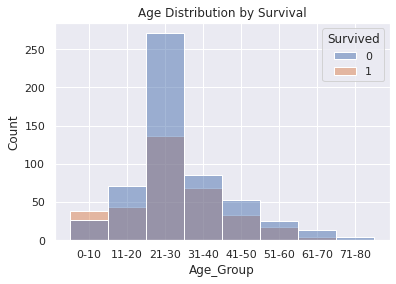

In [23]:
#Finding 2: check if age group had any impact on survival
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80,100], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-100'])
sns.histplot(data=titanic_df, x='Age_Group', hue='Survived', binwidth=5)

plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')

plt.show()

Kids below 10 years old have a higher survival rate and elder people above 60 years old has a lower survival rate. 
Since most other data is missing in age, we have imputed with mean of the age column . so most of the passengers are in range 20-30. This doesnt give us accuracy on age. 


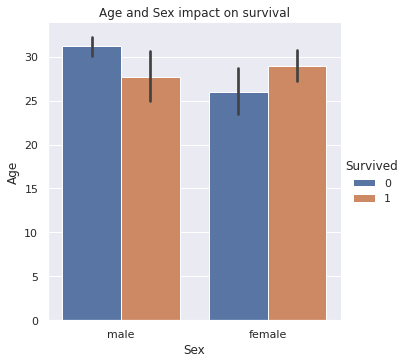

In [24]:
#Finding 3: check both age and sex impact on survival:

#sns.boxplot(x='Sex', y='Age', hue='Survived', data=titanic_df)

sns.catplot(x='Sex', y='Age', hue='Survived', kind='bar', data=titanic_df)

plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age and Sex impact on survival')

plt.show()


The plot says that more females compared to male in a certain age range were more positively correlated to survival

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


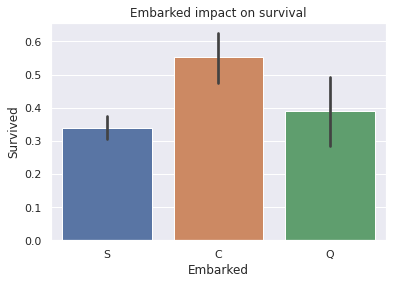

In [25]:
#Finding 4: check if embarked (port) had any effect on survival

pivot_table_embarked = titanic_df.pivot_table(values='Survived', index='Embarked', aggfunc='mean')
print(pivot_table_embarked)

sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.title('Embarked impact on survival')

plt.show()


Passengers who started from port C have higher survival rate than passengers from port S and Q

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = titanic_df[['Age', 'Fare', 'Pclass', 'Sex_num', 'SibSp', 'Parch']]
y = titanic_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate the number of correct predictions
correct_predictions = sum(y_pred == y_test)

# Calculate the total number of predictions
total_predictions = len(y_test)

# Calculate the accuracy
accuracy = correct_predictions / total_predictions
print('Accuracy: ', accuracy)


Accuracy:  0.8379888268156425
